# Assignment 8

## Target:
- Train deep learning repo training for 40 epoch
- Display 20 miss classified Images
- Display 20 GradCam output on the SAME misclassified images
- Apply these transforms while training:
  - RandomCrop(32, padding=4)
  - CutOut(16x16)
  - Rotate(±5°)
- Must use ReduceLROnPlateau
- Must use LayerNormalization ONLY

In the below I have trained the resnet model for layer normalization with the above mentioned details and displayed 20 correct and misclassified images below

In [1]:
%matplotlib inline

### Let's fresh install albumentations library as sometimes ols version gives error

In [2]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-df5sgjc2
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-df5sgjc2
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98174 sha256=72150609f5eb82752a7aea145b42ebd2a01885280c6b25a5d15c562e654c882e
  Stored in directory: /tmp/pip-ephem-wheel-cache-n8aazrnb/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


### Now let's clone our dl_framework repo in colab and import main function.
NOTE: I have tried running from command line by passing arguments and in local its working but in colab images are not getting displayed by that method. That's why I have taken the below approach.

In [3]:
!git clone https://github.com/santuhazra1/dl_framework.git
%cd "dl_framework"
!pwd

Cloning into 'dl_framework'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 132 (delta 31), reused 54 (delta 18), pack-reused 59
Receiving objects: 100% (132/132), 32.86 KiB | 10.95 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/dl_framework
/content/dl_framework


In [4]:
from main import main

### Let's define important parameters 

In [5]:
BATCH_SIZE = 128 #@param {type:"slider", min:32, max:512, step:32}
LEARNING_RATE = 0.007 #@param {type:"slider", min:0.001, max:0.1, step:0.001}
EPOCHS = 40 #@param {type:"slider", min:5, max:500, step:5}
NO_OF_IMAGES = 20 #@param {type:"slider", min:5, max:50, step:5}
NORM_TYPE = "layer" #@param ["batch", "layer", "group"]

### Here we are training resnet model with layer normalization below with above mentioned specification:



****************************************************************************

*****Model Summary*****
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/391 [00:00<?, ?it/s]


****************************************************************************

*****Training Starts*****

Training Epoch: 1


Training Set: Loss=2.1220557281123402, Batch_id=390, Train Accuracy=21.05: 100%|██████████| 391/391 [01:02<00:00,  6.23it/s]
Test Set: Loss=1.954870572573022, Batch_id=78, Test Accuracy=28.07: 100%|██████████| 79/79 [00:02<00:00, 26.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 2


Training Set: Loss=1.7920650606570037, Batch_id=390, Train Accuracy=33.05: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=1.584382783008527, Batch_id=78, Test Accuracy=40.49: 100%|██████████| 79/79 [00:02<00:00, 26.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 3


Training Set: Loss=1.6283996303368102, Batch_id=390, Train Accuracy=39.48: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=1.5502964710887475, Batch_id=78, Test Accuracy=42.89: 100%|██████████| 79/79 [00:03<00:00, 26.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 4


Training Set: Loss=1.5074725190696814, Batch_id=390, Train Accuracy=44.51: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=1.451119229763369, Batch_id=78, Test Accuracy=47.51: 100%|██████████| 79/79 [00:02<00:00, 27.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 5


Training Set: Loss=1.4139371567674914, Batch_id=390, Train Accuracy=48.10: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=1.2170514713359784, Batch_id=78, Test Accuracy=55.18: 100%|██████████| 79/79 [00:02<00:00, 26.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 6


Training Set: Loss=1.3119565428370406, Batch_id=390, Train Accuracy=52.44: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=1.1017370405076425, Batch_id=78, Test Accuracy=59.85: 100%|██████████| 79/79 [00:02<00:00, 27.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 7


Training Set: Loss=1.2082334942829884, Batch_id=390, Train Accuracy=56.69: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=1.0230015667178962, Batch_id=78, Test Accuracy=62.71: 100%|██████████| 79/79 [00:03<00:00, 26.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 8


Training Set: Loss=1.1274193531411993, Batch_id=390, Train Accuracy=59.49: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.9190429350997829, Batch_id=78, Test Accuracy=67.30: 100%|██████████| 79/79 [00:02<00:00, 26.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 9


Training Set: Loss=1.0490225801992294, Batch_id=390, Train Accuracy=62.52: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.9253348632703854, Batch_id=78, Test Accuracy=67.67: 100%|██████████| 79/79 [00:02<00:00, 26.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 10


Training Set: Loss=0.9874924578325218, Batch_id=390, Train Accuracy=64.95: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.7864379852632933, Batch_id=78, Test Accuracy=72.01: 100%|██████████| 79/79 [00:02<00:00, 26.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 11


Training Set: Loss=0.9237299250519794, Batch_id=390, Train Accuracy=67.26: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.7680541722080375, Batch_id=78, Test Accuracy=73.33: 100%|██████████| 79/79 [00:02<00:00, 26.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 12


Training Set: Loss=0.871611609178431, Batch_id=390, Train Accuracy=69.32: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.8038179474540904, Batch_id=78, Test Accuracy=71.97: 100%|██████████| 79/79 [00:02<00:00, 26.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 13


Training Set: Loss=0.8383110619871817, Batch_id=390, Train Accuracy=70.43: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.7397715019274361, Batch_id=78, Test Accuracy=74.00: 100%|██████████| 79/79 [00:02<00:00, 26.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 14


Training Set: Loss=0.8018976552102267, Batch_id=390, Train Accuracy=72.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.6436402556262438, Batch_id=78, Test Accuracy=77.04: 100%|██████████| 79/79 [00:02<00:00, 26.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 15


Training Set: Loss=0.7484701896262596, Batch_id=390, Train Accuracy=73.80: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.5575508695991733, Batch_id=78, Test Accuracy=80.69: 100%|██████████| 79/79 [00:03<00:00, 26.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 16


Training Set: Loss=0.7372719925992629, Batch_id=390, Train Accuracy=74.01: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.5920213660861873, Batch_id=78, Test Accuracy=79.55: 100%|██████████| 79/79 [00:02<00:00, 26.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 17


Training Set: Loss=0.699705027786972, Batch_id=390, Train Accuracy=75.39: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.6204699004375482, Batch_id=78, Test Accuracy=78.29: 100%|██████████| 79/79 [00:03<00:00, 26.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 18


Training Set: Loss=0.6761726243111789, Batch_id=390, Train Accuracy=76.27: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.5545216364951073, Batch_id=78, Test Accuracy=81.23: 100%|██████████| 79/79 [00:02<00:00, 26.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 19


Training Set: Loss=0.6428243193175177, Batch_id=390, Train Accuracy=77.29: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.5615393070480491, Batch_id=78, Test Accuracy=80.87: 100%|██████████| 79/79 [00:02<00:00, 26.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 20


Training Set: Loss=0.6211307375022518, Batch_id=390, Train Accuracy=78.42: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.5356544848484329, Batch_id=78, Test Accuracy=81.49: 100%|██████████| 79/79 [00:02<00:00, 26.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 21


Training Set: Loss=0.606811986554919, Batch_id=390, Train Accuracy=78.81: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.47996027107480205, Batch_id=78, Test Accuracy=83.48: 100%|██████████| 79/79 [00:02<00:00, 26.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 22


Training Set: Loss=0.5902143789221869, Batch_id=390, Train Accuracy=79.36: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.46564535966402365, Batch_id=78, Test Accuracy=84.16: 100%|██████████| 79/79 [00:02<00:00, 26.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 23


Training Set: Loss=0.563815686708826, Batch_id=390, Train Accuracy=80.35: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.4780349950247173, Batch_id=78, Test Accuracy=83.66: 100%|██████████| 79/79 [00:02<00:00, 26.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 24


Training Set: Loss=0.5535288673380147, Batch_id=390, Train Accuracy=80.67: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.46527045701123493, Batch_id=78, Test Accuracy=84.25: 100%|██████████| 79/79 [00:02<00:00, 26.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 25


Training Set: Loss=0.5290710721022028, Batch_id=390, Train Accuracy=81.64: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.4479669464539878, Batch_id=78, Test Accuracy=84.71: 100%|██████████| 79/79 [00:02<00:00, 26.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 26


Training Set: Loss=0.5164942999020257, Batch_id=390, Train Accuracy=82.01: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.4349073111256467, Batch_id=78, Test Accuracy=85.21: 100%|██████████| 79/79 [00:02<00:00, 27.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 27


Training Set: Loss=0.5037939142997917, Batch_id=390, Train Accuracy=82.42: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.46602212571645085, Batch_id=78, Test Accuracy=84.80: 100%|██████████| 79/79 [00:03<00:00, 26.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 28


Training Set: Loss=0.49043363751962665, Batch_id=390, Train Accuracy=82.97: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.42330575668359105, Batch_id=78, Test Accuracy=85.37: 100%|██████████| 79/79 [00:02<00:00, 26.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 29


Training Set: Loss=0.481887536051938, Batch_id=390, Train Accuracy=83.15: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.4447845873198932, Batch_id=78, Test Accuracy=84.99: 100%|██████████| 79/79 [00:02<00:00, 26.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 30


Training Set: Loss=0.46843022329118245, Batch_id=390, Train Accuracy=83.76: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.41681367281494264, Batch_id=78, Test Accuracy=85.86: 100%|██████████| 79/79 [00:02<00:00, 26.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 31


Training Set: Loss=0.46270188586333827, Batch_id=390, Train Accuracy=83.95: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.4241160399551633, Batch_id=78, Test Accuracy=85.62: 100%|██████████| 79/79 [00:03<00:00, 26.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 32


Training Set: Loss=0.4419165281840907, Batch_id=390, Train Accuracy=84.58: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.4422580218767818, Batch_id=78, Test Accuracy=85.36: 100%|██████████| 79/79 [00:03<00:00, 24.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 33


Training Set: Loss=0.4430795018477818, Batch_id=390, Train Accuracy=84.62: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
Test Set: Loss=0.4120236535238314, Batch_id=78, Test Accuracy=86.21: 100%|██████████| 79/79 [00:03<00:00, 26.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 34


Training Set: Loss=0.4177911119997654, Batch_id=390, Train Accuracy=85.44: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.3836691742645034, Batch_id=78, Test Accuracy=86.89: 100%|██████████| 79/79 [00:02<00:00, 26.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 35


Training Set: Loss=0.4145964382554564, Batch_id=390, Train Accuracy=85.55: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.36902735976478723, Batch_id=78, Test Accuracy=87.61: 100%|██████████| 79/79 [00:02<00:00, 26.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 36


Training Set: Loss=0.4083064493849454, Batch_id=390, Train Accuracy=85.71: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.34759943432445767, Batch_id=78, Test Accuracy=88.55: 100%|██████████| 79/79 [00:03<00:00, 26.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


*****Saving Model*****
Training Epoch: 37


Training Set: Loss=0.3968635926313717, Batch_id=390, Train Accuracy=86.15: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.374771595189843, Batch_id=78, Test Accuracy=87.70: 100%|██████████| 79/79 [00:03<00:00, 26.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 38


Training Set: Loss=0.384414941567899, Batch_id=390, Train Accuracy=86.65: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
Test Set: Loss=0.36737139202371427, Batch_id=78, Test Accuracy=87.54: 100%|██████████| 79/79 [00:02<00:00, 26.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 39


Training Set: Loss=0.3805150451410152, Batch_id=390, Train Accuracy=86.65: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.422815702195409, Batch_id=78, Test Accuracy=86.08: 100%|██████████| 79/79 [00:03<00:00, 26.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Training Epoch: 40


Training Set: Loss=0.3747829529635437, Batch_id=390, Train Accuracy=86.92: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
Test Set: Loss=0.38401458346391026, Batch_id=78, Test Accuracy=87.34: 100%|██████████| 79/79 [00:03<00:00, 26.04it/s]


*****Training Stops*****


****************************************************************************


****************************************************************************

*****Loss and Accuracy Details*****



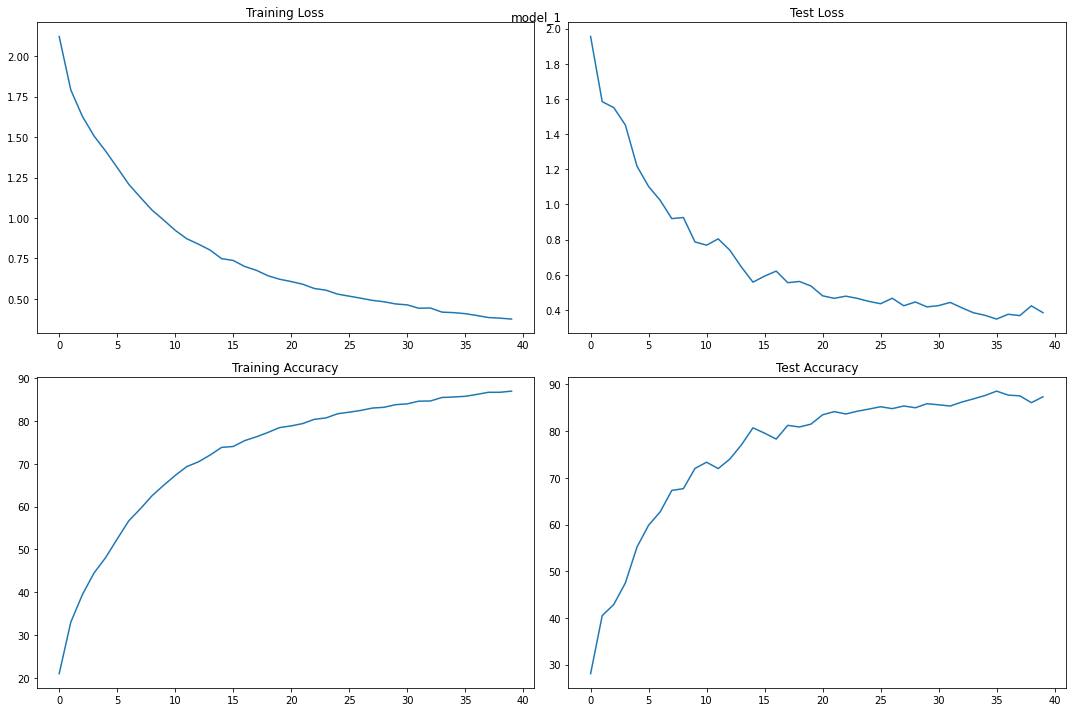


****************************************************************************


****************************************************************************

*****Correctly Classified Images*****

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

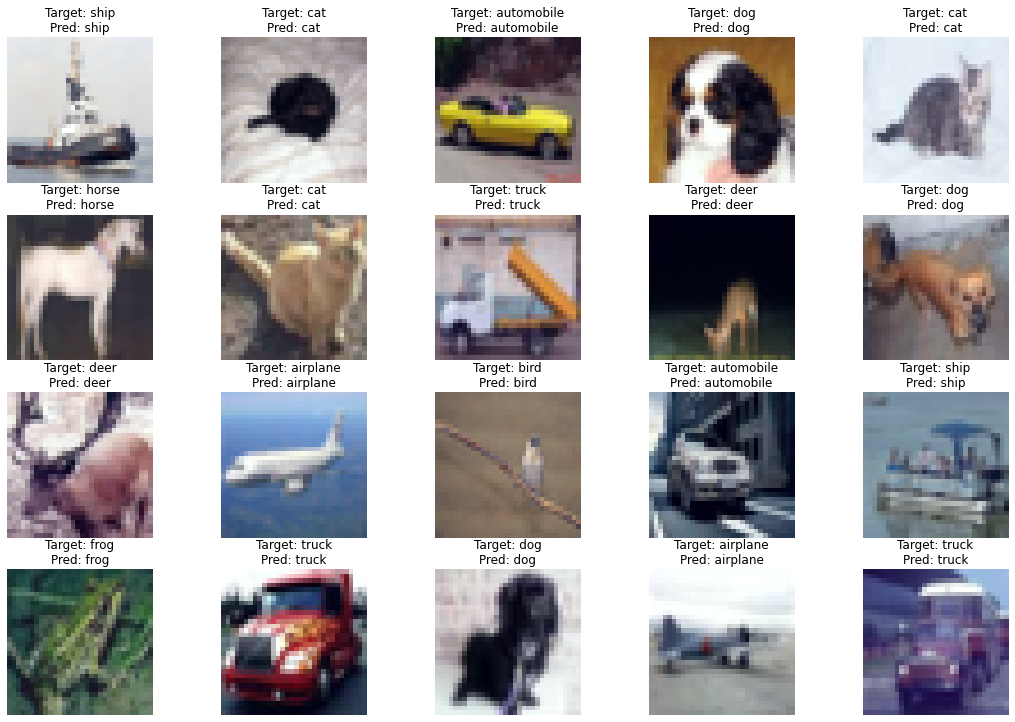


****************************************************************************

*****Correctly Classified GradCam Images*****

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

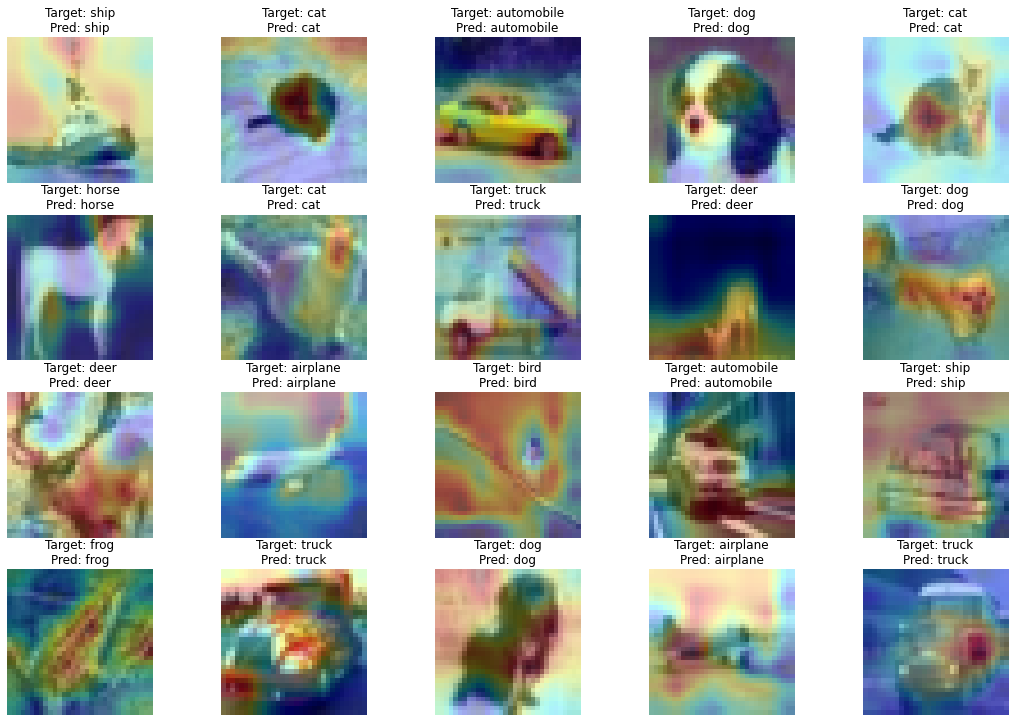


****************************************************************************

*****Misclassified Images*****

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


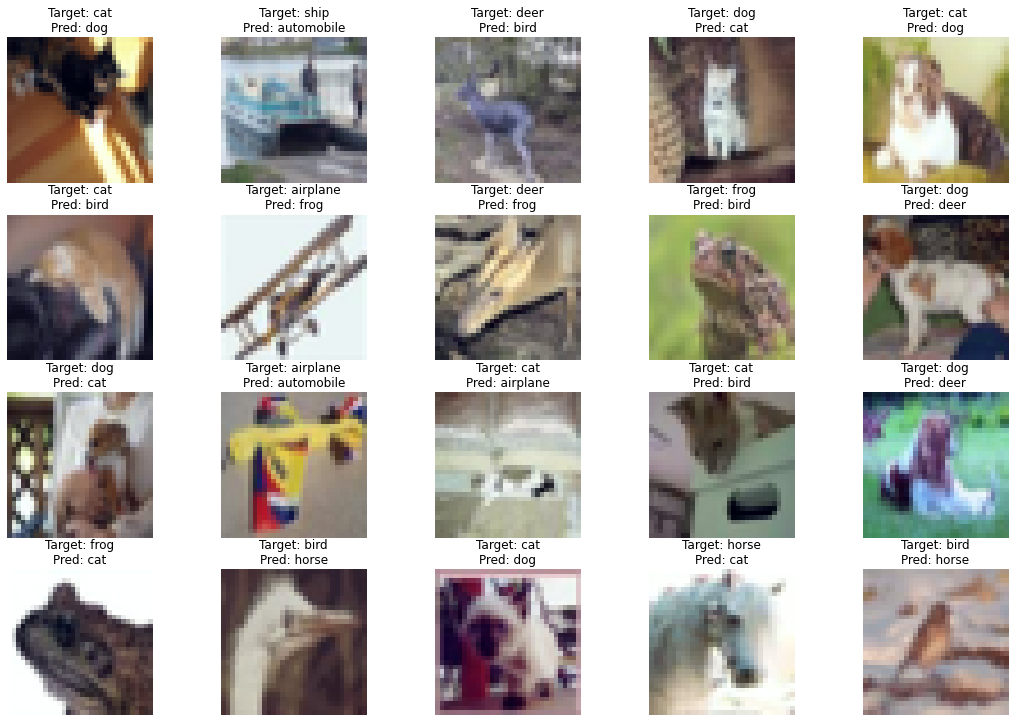


****************************************************************************

*****Misclassified GradCam Images*****

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


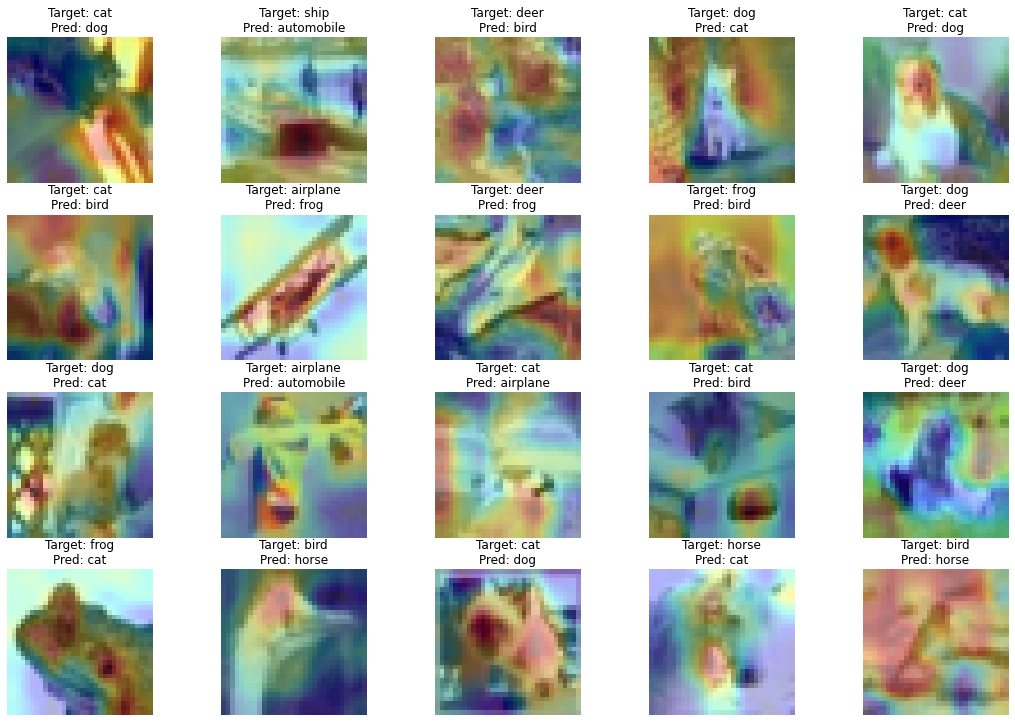


****************************************************************************



In [6]:
main(epochs = EPOCHS, norm = NORM_TYPE, batch_size = BATCH_SIZE, lr = LEARNING_RATE, n = NO_OF_IMAGES)